# XGBoost classifier
http://xgboost.readthedocs.io/en/latest/python/python_api.html

In [1]:
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = loadtxt('diabet.csv', delimiter=',')
dataset[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ,   1.   ])

In [5]:
X = dataset[:, 0:-1]
y = dataset[:, -1]
X.shape, y.shape

((768, 8), (768,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [9]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [10]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.75


## Model evaluation

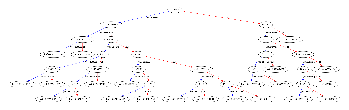

In [12]:
from xgboost import plot_tree

plot_tree(model)

In [13]:
print(model.feature_importances_)

[0.07100065 0.26054224 0.08863903 0.09389706 0.0966643  0.15330279
 0.08436987 0.1515841 ]


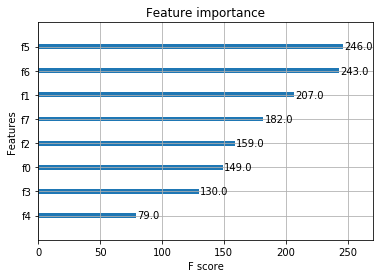

In [14]:
from xgboost import plot_importance

plot_importance(model)

## Early stopping to prevent overfitting

In [17]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.28516
[1]	validation_0-error:0.25781
[2]	validation_0-error:0.23047
[3]	validation_0-error:0.23438
[4]	validation_0-error:0.21484
[5]	validation_0-error:0.23047
[6]	validation_0-error:0.24219
[7]	validation_0-error:0.23438
[8]	validation_0-error:0.23828
[9]	validation_0-error:0.22266
[10]	validation_0-error:0.23047
[11]	validation_0-error:0.23047
[12]	validation_0-error:0.23047
[13]	validation_0-error:0.23438
[14]	validation_0-error:0.22266
[15]	validation_0-error:0.22266
[16]	validation_0-error:0.22266
[17]	validation_0-error:0.22266
[18]	validation_0-error:0.21484
[19]	validation_0-error:0.22266
[20]	validation_0-error:0.21875
[21]	validation_0-error:0.23047
[22]	validation_0-error:0.23047
[23]	validation_0-error:0.23047
[24]	validation_0-error:0.23047
[25]	validation_0-error:0.23047
[26]	validation_0-error:0.22656
[27]	validation_0-error:0.22656
[28]	validation_0-error:0.23438
[29]	validation_0-error:0.23438
[30]	validation_0-error:0.23438
[31]	validation_0-

c:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-error:0.23828
[34]	validation_0-error:0.24219
[35]	validation_0-error:0.24219
[36]	validation_0-error:0.23828
[37]	validation_0-error:0.23828
[38]	validation_0-error:0.23438
[39]	validation_0-error:0.23438
[40]	validation_0-error:0.23047
[41]	validation_0-error:0.23438
[42]	validation_0-error:0.24219
[43]	validation_0-error:0.24609
[44]	validation_0-error:0.24609
[45]	validation_0-error:0.24219
[46]	validation_0-error:0.24219
[47]	validation_0-error:0.23438
[48]	validation_0-error:0.23438
[49]	validation_0-error:0.24219
[50]	validation_0-error:0.23438
[51]	validation_0-error:0.24219
[52]	validation_0-error:0.23828
[53]	validation_0-error:0.23828
[54]	validation_0-error:0.23828
[55]	validation_0-error:0.23438
[56]	validation_0-error:0.23438
[57]	validation_0-error:0.23828
[58]	validation_0-error:0.23828
[59]	validation_0-error:0.23438
[60]	validation_0-error:0.23828
[61]	validation_0-error:0.24219
[62]	validation_0-error:0.23828
[63]	validation_0-error:0.23828
[64]	val

## Evaluate XGBoost Models With Learning Curves

[0]	validation_0-error:0.14844	validation_0-logloss:0.55537	validation_1-error:0.28516	validation_1-logloss:0.60655
[1]	validation_0-error:0.12695	validation_0-logloss:0.47064	validation_1-error:0.25781	validation_1-logloss:0.56701
[2]	validation_0-error:0.09961	validation_0-logloss:0.41033	validation_1-error:0.23047	validation_1-logloss:0.53854
[3]	validation_0-error:0.09766	validation_0-logloss:0.36684	validation_1-error:0.23438	validation_1-logloss:0.51664
[4]	validation_0-error:0.08789	validation_0-logloss:0.33898	validation_1-error:0.21484	validation_1-logloss:0.50189
[5]	validation_0-error:0.08008	validation_0-logloss:0.30874	validation_1-error:0.23047	validation_1-logloss:0.49558
[6]	validation_0-error:0.07422	validation_0-logloss:0.28684	validation_1-error:0.24219	validation_1-logloss:0.48856
[7]	validation_0-error:0.06641	validation_0-logloss:0.26620	validation_1-error:0.23438	validation_1-logloss:0.48681
[8]	validation_0-error:0.06445	validation_0-logloss:0.25176	validation_1

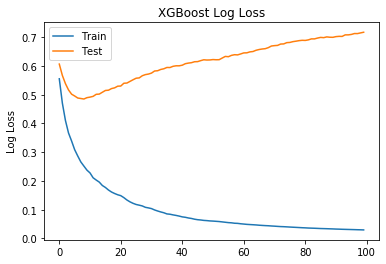

Text(0.5, 1.0, 'XGBoost Classification Error')

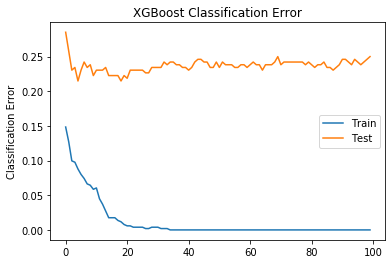

In [19]:
from matplotlib import pyplot

model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')


## Early stopping

In [20]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.60655
[1]	validation_0-logloss:0.56701
[2]	validation_0-logloss:0.53854
[3]	validation_0-logloss:0.51664
[4]	validation_0-logloss:0.50189
[5]	validation_0-logloss:0.49558
[6]	validation_0-logloss:0.48856
[7]	validation_0-logloss:0.48681
[8]	validation_0-logloss:0.48508
[9]	validation_0-logloss:0.48974
[10]	validation_0-logloss:0.49168
[11]	validation_0-logloss:0.49426
[12]	validation_0-logloss:0.50140
[13]	validation_0-logloss:0.50214
[14]	validation_0-logloss:0.50851
[15]	validation_0-logloss:0.51476
[16]	validation_0-logloss:0.51572
[17]	validation_0-logloss:0.52141
[18]	validation_0-logloss:0.52392
Accuracy: 76.17%


c:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Multithreading Support for XGBoost

c:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1 0.1932520866394043
2 0.18500590324401855
3 0.21499228477478027
4 0.25499749183654785


Text(0.5, 1.0, 'XGBoost Training Speed vs Number of Threads')

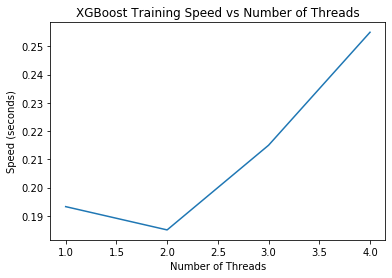

In [24]:
import time

results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
 start = time.time()
 model = XGBClassifier(nthread=n, eval_metric='error')
 model.fit(X_train, y_train)
 elapsed = time.time() - start
 print(n, elapsed)
 results.append(elapsed)
# plot results
pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')



## Tune the Number of Decision Trees

[12:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.680005 using {'n_estimators': 50}
-0.680005 (0.095550) with: {'n_estimators': 50}
-0.794099 (0.114600) with: {'n_estimators': 100}
-0.855984 (0.123852) with: {'n_estimators': 150}
-0.889420 (0.123638) with: {'n_estimators': 200}
-0.914452 (0.127086) with: {'n_estimators': 250}
-0.934681 (0.130575) with: {'n_estimators': 300}
-0.949324 (0.131390) with: {'n_estimators': 350}


c:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Text(0, 0.5, 'Log Loss')

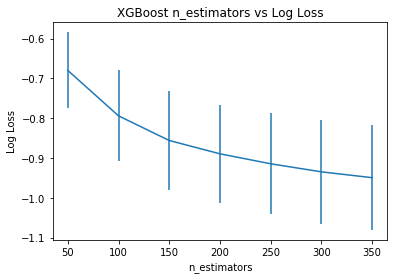

In [25]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
